Creates individual json files that are read by Gretel  
-> RUN IN EEG_3 ENVIRONMENT

In [31]:
from EEG_utils.EEG_utils import *

In [32]:
root_folder = "C:\\Users\\zanno\\physionet.org\\files\\chbmit\\1.0.0\\"

# observations = ["chb01_03", "chb01_04", "chb01_15", "chb01_16", "chb01_18", "chb01_21", "chb01_26"]
# observations = ["chb02_16", "chb02_19"]
# observations = ["chb03_01", "chb03_02", "chb03_03", "chb03_04", "chb03_34", "chb03_35", "chb03_36"]
# observations = ["chb04_28", "chb04_08"]
# observations = ["chb05_06", "chb05_13", "chb05_16", "chb05_17", "chb05_22"]
# observations = ["chb06_01", "chb06_04", "chb06_09", "chb06_10", "chb06_13", "chb06_18", "chb06_24"]

# observations = ["chb01_03", "chb01_04", "chb01_15", "chb02_16", "chb02_19", "chb03_01", "chb03_02", "chb03_03", "chb04_28", "chb04_08"]

# observations = ["chb03_01", "chb03_02", "chb03_03", "chb03_04", "chb03_34", "chb03_35", "chb03_36"]

patient_id = "chb03"
record_id = "01"
# record_id = "02"
# record_id = "03"
# record_id = "04"
# record_id = "34"
# record_id = "35"
# record_id = "36"

lag_nodes = 10
num_points = 400

num_node_features = 30

Extracting data...
Extracting EDF parameters from C:\Users\zanno\physionet.org\files\chbmit\1.0.0\chb03\chb03_01.edf...
EDF file detected
Setting channel info structure...


Creating raw.info structure...


c:\Users\zanno\explainability\GRETEL-repo\EEG_utils\EEG_utils.py:160: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(self.file_patient.get_record_path())


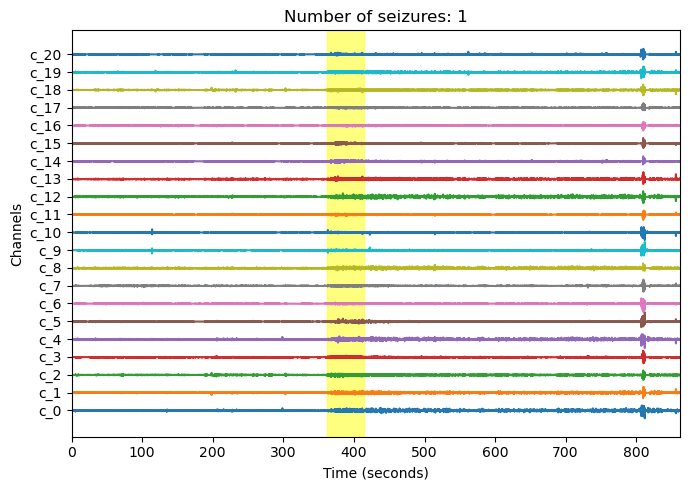

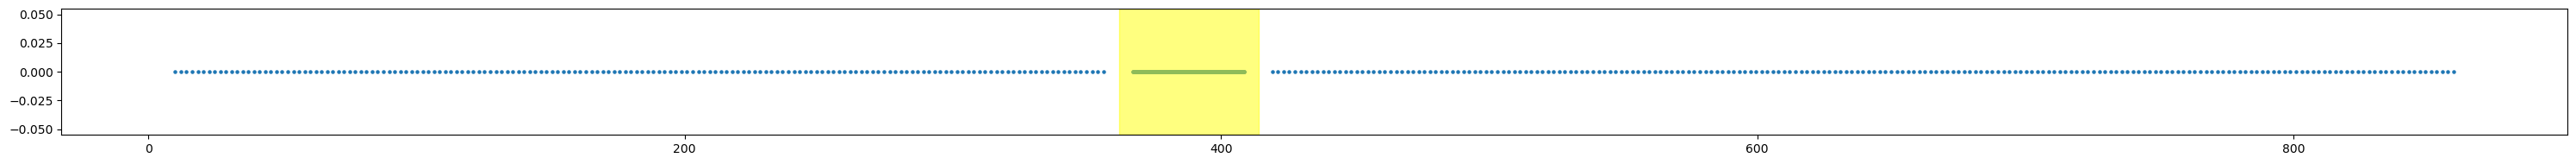

Creating graphs...
k: 2560 ---> t: 10.0 (seizure class: 0)
k: 3097 ---> t: 12.09765625 (seizure class: 0)
k: 3634 ---> t: 14.1953125 (seizure class: 0)
k: 4171 ---> t: 16.29296875 (seizure class: 0)
k: 4708 ---> t: 18.390625 (seizure class: 0)
k: 5245 ---> t: 20.48828125 (seizure class: 0)
k: 5782 ---> t: 22.5859375 (seizure class: 0)
k: 6319 ---> t: 24.68359375 (seizure class: 0)
k: 6856 ---> t: 26.78125 (seizure class: 0)
k: 7393 ---> t: 28.87890625 (seizure class: 0)
k: 7930 ---> t: 30.9765625 (seizure class: 0)
k: 8467 ---> t: 33.07421875 (seizure class: 0)
k: 9004 ---> t: 35.171875 (seizure class: 0)
k: 9541 ---> t: 37.26953125 (seizure class: 0)
k: 10078 ---> t: 39.3671875 (seizure class: 0)
k: 10615 ---> t: 41.46484375 (seizure class: 0)
k: 11152 ---> t: 43.5625 (seizure class: 0)
k: 11689 ---> t: 45.66015625 (seizure class: 0)
k: 12226 ---> t: 47.7578125 (seizure class: 0)
k: 12763 ---> t: 49.85546875 (seizure class: 0)
k: 13300 ---> t: 51.953125 (seizure class: 0)
k: 13837 ---

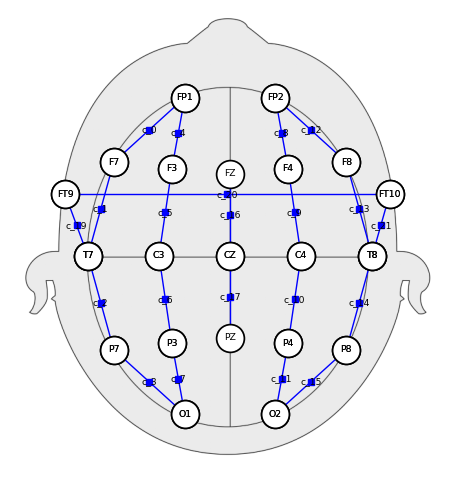

In [33]:
# Create patient
patient = Patient(FilePatient(root_folder, patient_id, record_id), num_points=num_points, num_node_features=num_node_features, lag_nodes=lag_nodes)

# Extract data
print('Extracting data...')
patient.extract_seizure_info()      # Extracting seizure information
patient.load_data()                 # Loading EEG data
patient.plot_signals()              # Plotting the signals with seizures highlighted

# Compute indices
patient.compute_indices()           # Performing sliding window correlation
patient.plot_indices()              # I can also do patient.plot_indices(xlim=(600,900))

# Create graph
print('Creating graphs...')
export_data_to_GRETEL(patient)      # Create graphs for GRETEL

print('Calculating nodes\' coordinates...')
export_coordinates(patient)         # Export coordinates

# __________________________________________________________________________

In [34]:
import datetime

now = datetime.datetime.now()
print("Last full run:", now.strftime("%d/%m/%Y, ore %H:%M"))

Last full run: 01/04/2025, ore 16:03


In [35]:
import winsound

winsound.Beep(440, 500)
winsound.Beep(400, 500)
winsound.Beep(440, 500)